# A brief tour of data wrangling for psychologists in python

## By using python for data analyses, you win:

- A real programming language (i.e. more transferable skill) 
- Beauty, elegance, **readability**, in short the zen of python (ex?) 
- The ultimate glue/scripting language
- Usually more straightforward to do non-statistical tasks in Python (than in R), e.g. fancy preprocessing, string processing, web scraping, file handling,...
- Connections to many well-developed scientific libraries: numpy (matrix computations), scipy (scientific computing), scikit.image (image processing), scikit.learn (machine learning),...
- Interactive notebooks! (because the [paper is getting obsolete](https://www.theatlantic.com/science/archive/2018/04/the-scientific-paper-is-obsolete/556676/))

## You lose:

- Switch cost (often considerable for non-professional programmers) when you program experiments in python anyway 
- Basic data analysis functionality that is not built-in but available through libraries (even more modular than R)
- Specific advanced analysis techniques not available (others, such as machine learning tools are often better supported in python). This is rapidly improving, but still more in alpha/beta stage instead of finished/tested/documented libraries.
- The large knowledge base/support (as a statistics tool) that R has (e.g. in the department)

# But lots of commonalities in the logic of data wrangling, plotting & analyzing

No reason to choose, you can use both **depending on your needs or processing stage**. For example:

- You wrote your experiment in python and want to do some preliminary preprocessing or (descriptive) analyses on single-subject data immediately after this individual is tested. You don't need to switch to R (the psychopy trialHandler gives you immediate access to a pandas dataframe of your data).
- You want to automatize some operation on files such as datafiles, images, etc. (renaming, reformatting, resizing, or equating images on some feature) or on strings in files (eg your recorded data does not have the right formatting). This is easier in python.
- Then you want to take advantage of tidyverse/ggplot2, you switch to R.
- You want to do a (generalized) mixed model or Bayesian analysis, you stay in R.
- You like to apply a fancy machine learning algorithm to your data, you switch to python again.

All steps can be done in either language but effort/support differs depending on case.


# In python statistical functionality is not built-in...

### Useful python packages for psychologists

#### In order of importance:
- [Jupyter notebooks](http://jupyter.org/) or better: [Jupyterlab](https://blog.jupyter.org/jupyterlab-is-ready-for-users-5a6f039b8906) (the Rstudio of python, with interactive "shiny app"-like functionality)
- [pandas](https://pandas.pydata.org/): data handling & descriptive analyses, 
- Plotting: [matplotlib](https://matplotlib.org/) (~R base plotting), [seaborn](http://seaborn.pydata.org/index.html) (written by a cognitive neuroscientist) and/or [plotnine](http://plotnine.readthedocs.io/en/stable/) (ggplot2 alternative)
- [statsmodels](https://www.statsmodels.org): statistical models (glm, t-tests,...)
- Specialized analyses: [Psignifit](http://psignifit.sourceforge.net/) (psychometric function fitting), [Bambi](https://github.com/bambinos/bambi)/[Kabuki](https://github.com/hddm-devs/kabuki) (hierarchical bayesian models), [NIPY](http://nipy.org/), [MNE](http://martinos.org/mne/stable/index.html), [PyMVPA](http://www.pymvpa.org/) 
- [More libraries](https://www.marsja.se/best-python-libraries-psychology/)

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt # roughly ~base R plotting functionality
import pandas as pd #roughly ~base R & tidyr functionality 
import seaborn as sns #roughly ~ggplot2 functionality
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

#to make the plots appear inline, and saved in notebook:
%matplotlib inline
sns.set_context("talk") # seaborn function to make plots according to purpose (talk, paper, poster, notebook)

# We'll show people what versions we use
import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)
import IPython
print(IPython.sys_info())
!pip freeze | grep -E 'seaborn|matplotlib|pandas|statsmodels'

Matplotlib Version: 2.2.3
NumPy Version: 1.15.2
('Pandas Version:', u'0.23.0')
Python Version: 2.7.15+ (default, Oct  2 2018, 22:12:08) 
[GCC 8.2.0]
Ran on 2018-11-14T18:39:29.291564
{'commit_hash': u'a0d6ad545',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/usr/local/lib/python2.7/dist-packages/IPython',
 'ipython_version': '5.7.0',
 'os_name': 'posix',
 'platform': 'Linux-4.18.0-10-generic-x86_64-with-Ubuntu-18.10-cosmic',
 'sys_executable': '/usr/bin/python',
 'sys_platform': 'linux2',
 'sys_version': '2.7.15+ (default, Oct  2 2018, 22:12:08) \n[GCC 8.2.0]'}
matplotlib==2.2.3
pandas==0.23.0
seaborn==0.8.1
statsmodels==0.8.0


# Pandas for data wrangling
![Image of panda](https://media.giphy.com/media/MpjZmG4eTvso8/giphy.gif)

Multiple great tutorials already exist on how to handle, clean and shaping data into the right format(s) for your visualizations and analyses in python. I was helped by the [10 minutes to pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/10min.html), this [brief overview](https://drive.google.com/open?id=0BwlD7q-DXkdWRUMyc19NdGNKRHc), I still regularly need to check this [cheat sheet](https://drive.google.com/open?id=0BwlD7q-DXkdWVkJQLVhGeHA3elk), and of course google/stackoverflow gives you access to the very bright and helpful python data science community. 

If you want a more thorough explanation of pandas, check this [book on python for data analysis](https://drive.google.com/open?id=0BwlD7q-DXkdWZHB6a0szLVN5WDQ) or this [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook).

Rather than rehash what's in those works, we will learn by example using the data from a Navon experiment with hierarchical letters probing precedence and interference of global processing. For more background and a description of the experiment, see [Chamberlain et al. (2017)](https://drive.google.com/open?id=0BwlD7q-DXkdWeEJaUWtwaTlPYU0):

> "The Navon task was a modified version of a hierarchical letter paradigm (Navon, 1977), designed to reduce the potential influence of factors confounding global processing such as spatial location and variation in shape characteristics. Participants were required to distinguish whether a global letter shape made up of local letters or the local letters themselves were vowels or consonants (Fig. 1). Vowel and consonant letter shapes were kept as comparable as possible. There were 5 consonant types (C, D, F, H, T) and 5 vowel types (A, E, I, O, U). Trial congruency was defined by the category type (vowel/consonant). In some congruent trials the exact letter identity matched between local and global stimulus levels, whilst in all other congruent trials only the category type matched. Presentation location of the test stimulus was randomized on a trial-by-trial basis, in order to eliminate the ability of participants to fixate on local spatial locations to determine global shape. The stimulus was presented in one of four corners of a 100x100-pixel square around central fixation. There were 10 practice trials followed by two blocks of 100 experimental trials.
In alternate blocks whose order was randomized, participants were instructed to either focus on the global letter shape (global selective attention) or on the local letter shapes (local selective attention) and press the ‘J’ key if the letter was a vowel, and the ‘F’ key if the letter was a consonant. Each trial began with a fixation cross presented for 1000 ms. The fixation cross then disappeared and was followed by the experimental stimulus (a white letter
shape on a black background). The stimuli were presented for 300 ms followed by a 4 s response window. Feedback was presented in the form of a coloured (red/green) fixation cross which also encouraged central fixation for the next trial. Both accuracy and reaction time(s) were recorded. Stimulus presentation and data collection were controlled using the Psychopy package (Peirce, 2007) and stimuli were created using the MATLAB toolbox GERT (v1.20) (Demeyer & Machilsen, 2012)."

<img src="https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/5dfad0622ef45b90e53baae9ddd7c42609497a00/3-Figure1-1.png" width=500>

### Reading in our data...

In [153]:
!pwd
!ls data/ #we can use shell commands to see where the data is (ls=dir on windows)

/home/sander/Bureaublad/Dropbox/exp/Reproducible_workflow_tutorial/PythoninPsy
CO10  demographicNavonGlobCO10.csv  demographicNavonLocCO10.csv
CO12  demographicNavonGlobCO12.csv  demographicNavonLocCO12.csv


In [6]:
import glob, os #to work with paths

df = pd.DataFrame()
folders = ['CO10','CO12'] # the raw data is in two different folders

for folder in folders:
    if folder=='CO10': sep=';' #data in different folders use different field separators
    else: sep=','
    
    all_files = glob.glob(os.path.join('data', folder, "*.csv")) # get list of individual data files
    df_from_each_file = (pd.read_csv(f,  sep=sep, index_col=0) for f in all_files)
    concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
    df = df.append([df,concatenated_df])

df.head()

,acc_mean,acc_raw,acc_std,age,cond,condition,congruence,corrAns,expversion,gender,...,n,order,participant,resp_raw,rt_mean,rt_raw,rt_std,stimFile,xPos,yPos
0,1,1,0,18.0,selAttGlob,Cc,congruent,['f'],NaN,F,...,1,18,12277,'f',"0,746331811","0,746331811",0,Global_C_local_C.png,NaN,-50
1,1,1,0,18.0,selAttGlob,Cc,congruent,['f'],NaN,F,...,1,41,12277,'f',"0,687273145","0,687273145",0,Global_C_local_D.png,NaN,50
2,1,1,0,18.0,selAttGlob,Cc,congruent,['f'],NaN,F,...,1,46,12277,'f',"0,705967069","0,705967069",0,Global_C_local_F.png,NaN,-50
3,1,1,0,18.0,selAttGlob,Cc,congruent,['f'],NaN,F,...,1,78,12277,'f',"0,661773503","0,661773503",0,Global_C_local_H.png,NaN,-50
4,1,1,0,18.0,selAttGlob,Cc,congruent,['f'],NaN,F,...,1,74,12277,'f',"0,794407368","0,794407368",0,Global_C_local_T.png,NaN,-50


In [7]:
# add demographics
all_files = glob.glob(os.path.join('data', "*.csv"))
df_from_each_file = (pd.read_csv(f,  sep=sep, index_col=0) for f in all_files)

dfdemo = (pd.concat(df_from_each_file, ignore_index=True, axis=0)
            .drop_duplicates(['Subject'], keep='first', inplace=False) # drop duplicate rows for subjects
            .sort_values('Subject')  
         )

dfdemo.head()

,Subject,age,gender
0,7576,19.0,1.0
1,10711,20.0,1.0
2,10771,20.0,1.0
3,11200,19.0,1.0
4,11212,18.0,1.0


Note the **method chaining** in the example above. Most pandas methods return a DataFrame so that another pandas method can be applied to the result (with the dot formulation). Using the [pandas-ply](https://github.com/coursera/pandas-ply) library you can also use dplyr style piping in pandas. Depending on how you value  code readability, performance or debugging you'll prefer one or the other.

In [34]:
print dfdemo.age.value_counts()
print df.groupby(['participant']).age.apply(lambda x: x.iloc[0]).value_counts()

18.0    145
19.0     78
20.0     24
21.0     10
23.0      4
24.0      4
40.0      1
28.0      1
17.0      1
25.0      1
41.0      1
22.0      1
26.0      1
Name: age, dtype: int64
18.0    145
19.0     78
20.0     24
21.0     10
23.0      4
24.0      4
40.0      1
28.0      1
17.0      1
25.0      1
41.0      1
22.0      1
26.0      1
Name: age, dtype: int64


In [8]:
# age column is the same between dfs so we can drop it in the original data before merging
df=df.drop(['age'], axis=1)

In [9]:
df= pd.merge(df, dfdemo, how='left', left_on='participant', right_on='Subject')
df.head()

,acc_mean,acc_raw,acc_std,cond,condition,congruence,corrAns,expversion,gender_x,location,...,resp_raw,rt_mean,rt_raw,rt_std,stimFile,xPos,yPos,Subject,age,gender_y
0,1,1,0,selAttGlob,Cc,congruent,['f'],NaN,F,left_right,...,'f',"0,746331811","0,746331811",0,Global_C_local_C.png,NaN,-50,12277,18.0,1.0
1,1,1,0,selAttGlob,Cc,congruent,['f'],NaN,F,up_right,...,'f',"0,687273145","0,687273145",0,Global_C_local_D.png,NaN,50,12277,18.0,1.0
2,1,1,0,selAttGlob,Cc,congruent,['f'],NaN,F,down_right,...,'f',"0,705967069","0,705967069",0,Global_C_local_F.png,NaN,-50,12277,18.0,1.0
3,1,1,0,selAttGlob,Cc,congruent,['f'],NaN,F,left_right,...,'f',"0,661773503","0,661773503",0,Global_C_local_H.png,NaN,-50,12277,18.0,1.0
4,1,1,0,selAttGlob,Cc,congruent,['f'],NaN,F,down_right,...,'f',"0,794407368","0,794407368",0,Global_C_local_T.png,NaN,-50,12277,18.0,1.0


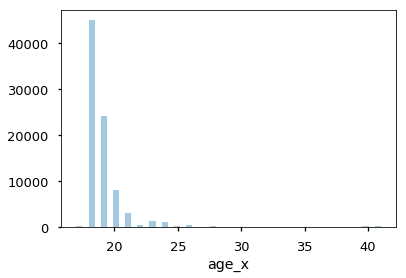

In [13]:
sns.distplot(df.age.dropna(), kde=False);

### Dataframe characteristics

In [321]:
print 'Variables:\n', df.columns
print 'variables:\n', df.dtypes
print 'nb of participants:', len(df['participant'].unique())
print 'trials per participant:', len(df)/ len(df['participant'].unique()) #not exactly

Variables:
Index([u'acc_mean', u'acc_raw', u'acc_std', u'age_x', u'cond', u'condition',
       u'congruence', u'corrAns', u'expversion', u'gender_x', u'location',
       u'n', u'order', u'participant', u'resp_raw', u'rt_mean', u'rt_raw',
       u'rt_std', u'stimFile', u'xPos', u'yPos', u'Subject', u'age_y',
       u'gender_y'],
      dtype='object')
variables:
acc_mean         int64
acc_raw          int64
acc_std          int64
age_x          float64
cond            object
condition       object
congruence      object
corrAns         object
expversion      object
gender_x        object
location        object
n                int64
order            int64
participant      int64
resp_raw        object
rt_mean         object
rt_raw          object
rt_std           int64
stimFile        object
xPos           float64
yPos             int64
Subject          int64
age_y          float64
gender_y       float64
dtype: object
nb of participants: 275
trials per participant: 309


## Cleaning data

In [10]:
# rename a variable/column
df = df.rename(columns={'acc_raw': 'acc', 'rt_raw': 'rt'})

In [11]:
#properly format RTs (dot notation)
df['rt'] = df['rt'].apply(lambda x: str(x).replace(',','.')).astype('float64')
# fill in missing values
df.loc[df.rt<0,['rt']]= np.nan

In [20]:
# we have 2 gender columns now, how do they compare?
df.gender_x.value_counts()

F    44800
M    15600
Name: gender_x, dtype: int64

In [19]:
# Correcting values in gender column
df.loc[df['gender_x'] == 'vrouw', 'gender_x'] = 'F'

In [30]:
df.groupby('gender_x')['participant'].nunique()


count     151
unique      2
top         F
freq      112
Name: gender_x, dtype: object
count     60400
unique        2
top           F
freq      44800
Name: gender_x, dtype: object
F    44800
M    15600
Name: gender_x, dtype: int64


In [29]:
# check gender stats
df.groupby('gender_y')['participant'].nunique()


count     151.0
unique      2.0
top         1.0
freq      110.0
Name: gender_y, dtype: float64
count     60400.0
unique        2.0
top           1.0
freq      44000.0
Name: gender_y, dtype: float64
1.0    44000
0.0    16400
Name: gender_y, dtype: int64


In [245]:
# count missing values
df.isnull().sum()

acc_mean           0
acc                0
acc_std            0
age_x            600
cond               0
condition          0
congruence         0
corrAns            0
expversion     60400
gender_x       24800
location           0
n                  0
order              0
participant        0
resp_raw         302
rt_mean            0
rt               302
rt_std             0
stimFile           0
xPos           60400
yPos               0
Subject            0
age_y            600
gender_y       24800
dtype: int64

In [12]:
# Save merged data
df.to_csv('dfmerged.csv')

In [4]:
# Save merged data
df = pd.read_csv('dfmerged.csv')

# Group by: split-apply-combine

Common operation:
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

Can be about: 
- calculating some aggregate measurement for each group (*agg(function)*, *size()*, *mean()*, *apply(function)*, *rolling()*, etc.)
- filtering the rows on a property of the group they belong to (*filter()*)
- calculating a new value for each row based on a property of the group (*transform()*), e.g. create a column with Z-scores

It helps to start with the result you want, and work backwards from there. If you want to get a single value for each group, use aggregate(), apply() (or one of the shortcuts). If you want to get a subset of the original rows, use filter(). And if you want to get a new value for each original row, use transform(). Check [this page](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-grouping) for some more advanced groupby recipes. Note that *apply()* is [most flexible](http://pandas-docs.github.io/pandas-docs-travis/groupby.html#flexible-apply) because it can implement an aggregate or a transform, and anything in between. Examples follow...

In [289]:
df.groupby(['cond', 'congruence']).acc.mean() #.reset_index()

cond        congruence 
selAttGlob  congruent      0.918967
            incongruent    0.899812
selAttLoc   congruent      0.936808
            incongruent    0.894413
Name: acc, dtype: float64

Insert a column with standardized RT:

In [16]:
zscore = lambda x: (x - x.mean()) / x.std()
df.insert(17, 'Zage', df.groupby(['participant'])['age'].transform(zscore))

## Removing outliers

In [13]:
# proportion of incorrect trials
1-df.acc.mean()

0.08750000000000002

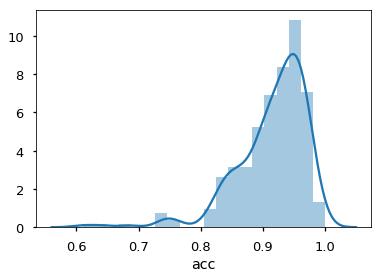

In [22]:
sns.distplot(df.groupby(['participant']).acc.mean(), bins=20);

#### Get help on how to use a method:

In [ ]:
?sns.distplot()

Or just press *shift-tab* when cursor is on a method/module to view info. Note that you can find all jupyter lab commands in the left panel, under the *Commands* tab. You can also open a console (file-> view console for notebook) to quickly try out some code before entering them in a cell.

#### Remove participants with mean accuracy lower than (mean acc - 2.5*std of accuracy) 

In [14]:
df = df.groupby('participant').filter(
    lambda x : x['acc'].mean() > df.acc.mean()-(2.5*df.groupby(['participant']).acc.mean().std()))

print len(df.participant.unique())

266


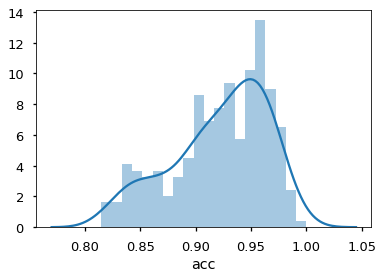

In [45]:
sns.distplot(df.groupby(['participant']).acc.mean(), bins=20);

# RT analysis

In [15]:
# discard incorrect trials for RT analyses
dfrt = df[df.acc==1]

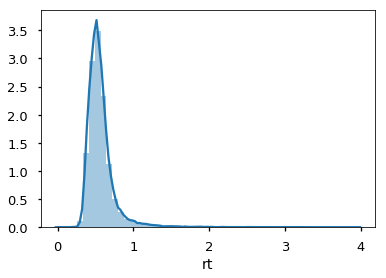

In [16]:
sns.distplot(dfrt.rt);

#### Remove participants with mean rt lower than (overall mean rt - 2.5*std of rt)

In [16]:
dfrt = dfrt.groupby('participant').filter(
    lambda x : x['rt'].mean() < df.rt.mean()+(2.5*df.groupby(['participant']).rt.mean().std()))

print len(dfrt.participant.unique())

258


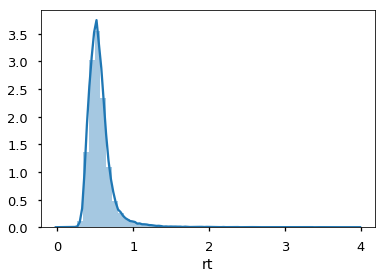

In [18]:
sns.distplot(dfrt.rt);

#### One could define outlier RTs on the individual level as well...

In [14]:
len(dfrt)

85200

In [19]:
dfrt = dfrt[dfrt.groupby('participant').rt.transform('mean') +(2.5*dfrt.groupby('participant').rt.transform('std')) > dfrt.rt]
len(df)

82200

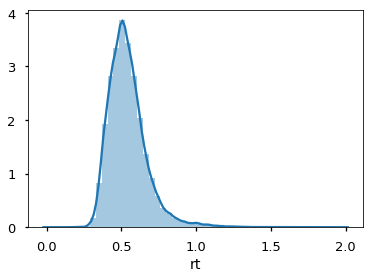

In [20]:
sns.distplot(dfrt.rt);

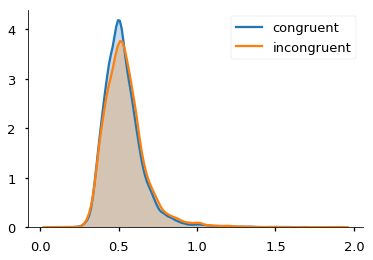

In [21]:
fig, ax = plt.subplots()
conditions = ['congruent', 'incongruent']

for condition in conditions:
    condition_data = dfrt[(dfrt['congruence'] == condition) & (dfrt['cond'] == 'selAttGlob')]['rt']
    sns.kdeplot(condition_data, shade=True, label=condition)
    
sns.despine()

[More ways](https://www.marsja.se/response-time-distributions-using-python/) to explore RT distributions.

In [52]:
# summary statistics of RT per condition
dfrt.groupby(['condition','cond','congruence']).rt.describe()

count      mean       std       min  \
condition cond       congruence                                          
Cc        selAttGlob congruent    9009.0  0.542534  0.127964  0.207480   
          selAttLoc  congruent    9089.0  0.556194  0.135140  0.189890   
Cv        selAttGlob incongruent  8721.0  0.559838  0.142280  0.102924   
          selAttLoc  incongruent  8708.0  0.539550  0.123220  0.068658   
Vc        selAttGlob incongruent  8958.0  0.523678  0.125208  0.069782   
          selAttLoc  incongruent  8651.0  0.584175  0.142684  0.015780   
Vv        selAttGlob congruent    9092.0  0.513652  0.115375  0.229930   
          selAttLoc  congruent    9234.0  0.516471  0.115800  0.199753   

                                       25%       50%       75%       max  
condition cond       congruence                                           
Cc        selAttGlob congruent    0.461660  0.523406  0.598791  1.582623  
          selAttLoc  congruent    0.466694  0.536255  0.615781  1.714776  
Cv        selAttGlob incongruent  0.469102  0.538965  0.618073  1.845350  
          selAttLoc  incongruent  0.453851  0.524752  0.606011  1.735075  
Vc        selAttGlob incongruent  0.439635  0.509356  0.581043  1.911829  
          selAttLoc  incongruent  0.491742  0.563984  0.648891  1.976961  
Vv        selAttGlob congruent    0.437660  0.496987  0.570268  1.520877  
          selAttLoc  congruent    0.435849  0.500862  0.574013  1.470798

# Seaborn for visualization

- Attractive and informative statistical graphics in Python.
- With minimal effort or tweaking (often work on the full dataset instead of summary)
- Invites quick exploration (supports violins, swarms, boxes, lines, bars, strips, heatmaps, faceting...)
- Tuned to the needs of psychologists (made by a cognitive neuroscientist)
- A [gallery](https://seaborn.pydata.org/examples/index.html) of what's possible.

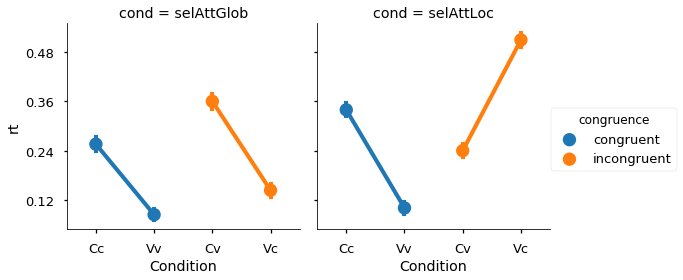

In [36]:
g = sns.factorplot(x="condition", y="rt", hue="congruence",
               col="cond", unit='participant', data=dfrt, kind="point"); 

g.set(xlabel="Condition", yticklabels=[y for y in  np.linspace(0,.6,6)]);

### Some features of Seaborn plots:

- [Factorplot](https://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot) is a categorical, faceted plot: "It is important to choose how variables get mapped to the plot structure such that the most important comparisons are easiest to make. As a general rule, it is easier to compare positions that are closer together, so the hue variable should be used for the most important comparisons".
- Note the unit parameter: Identifier of sampling units, which will be used to perform a multilevel bootstrap for the confidence intervals (errorbars) and account for repeated measures design.
- Hence, you can input the full dataset
- The default errorbar is 95% ci, but you could set it to another size, or to *sd* or to *none*
- The default estimator plotted is the mean, but this can also changed to any summary function.
- The *kind* parameter can be set to {point, bar, count, box, violin, strip}. But you can also call the base function, e.g. boxplot() (see example below)
- Seeing that seaborn is built on top of matplotlib, you can always further customize plots using matplotlib methods (see example below).


In [49]:
# we could define a function for saving plots for use outside of notebook (e.g. in paper)
def save_fig(fig, figname):
    if not os.path.exists('figs'):
        os.makedirs('figs')
    fig.savefig("figs/%s.pdf" % figname, dpi=300) #high dpi for printing
    fig.savefig("figs/%s.png" % figname, dpi=300)
    fig.savefig("figs/%s.svg" % figname, dpi=300)

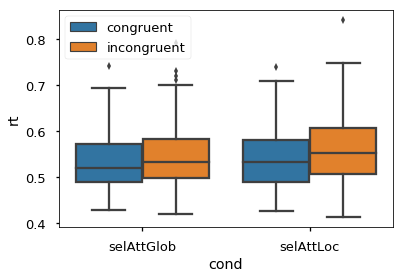

In [59]:
dfsum = dfrt.groupby(['participant', 'congruence', 'cond']).rt.mean().reset_index()
g = sns.boxplot(x="cond", y="rt", hue="congruence", data=dfsum);
g.legend(loc="upper left");
save_fig(g.get_figure(),'box')

add raincloud plots: https://wellcomeopenresearch.org/articles/4-63/v1  https://github.com/RainCloudPlots/RainCloudPlots/blob/master/tutorial_python/raincloud_tutorial_python.ipynb
Add dabest: https://github.com/ACCLAB/DABEST-python
            

# Compute difference scores (interference) and plot distributions

In [20]:
def interference(group):
    return group[group.congruence=='incongruent'].rt.mean()-group[group.congruence=='congruent'].rt.mean()

dfIF = dfrt.groupby(['participant','cond']).apply(interference).reset_index()
dfIF = dfIF.rename(columns={0: 'interference'})

dfIF.head()

,participant,cond,interference
0,7576,selAttGlob,0.008086
1,7576,selAttLoc,0.014542
2,10711,selAttGlob,0.013350
3,10711,selAttLoc,0.024520
4,10771,selAttGlob,0.066292


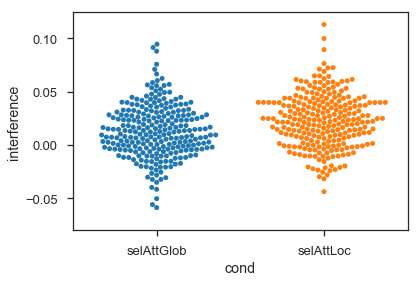

In [75]:
sns.swarmplot(x="cond", y="interference", data=dfIF);

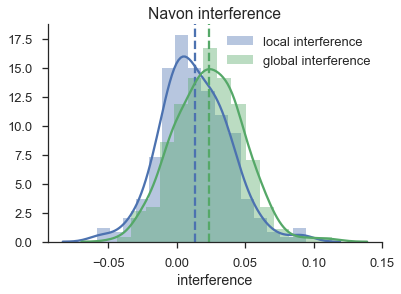

In [152]:
sns.set_context("poster", font_scale=1.3)
sns.set_palette('deep') # options: deep, muted, bright, pastel, dark, colorblind

fig, ax = plt.subplots(figsize=(10, 6))
conditions = ['selAttGlob', 'selAttLoc']

for i, condition in enumerate(conditions):
    condition_data = dfIF[(dfIF['cond'] == condition)]['interference']
    sns.distplot(condition_data, label=condition);
    ax.axvline(x=dfIF[(dfIF['cond'] == condition)]['interference'].mean(), linestyle='--', color= sns.color_palette()[i])

# embellish plot
sns.despine()

ax.set_title('Navon interference on reaction times')
ax.set_xlabel("Interference")

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['local interference', 'global interference'], loc="best");
save_fig(fig, "interference")

For more customization options, see the [seaborn tutorials](https://seaborn.pydata.org/tutorial.html). More flexibility is provided by the matplotlib core: [a cheat sheet](https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/Jwink3101/e6b57eba3beca4b05ec146d9e38fc839/raw/f486ca3dcad44c33fc4e7ddedc1f83b82c02b492/Matplotlib_Cheatsheet).

### Let's do a quick t-test...

In [28]:
from statsmodels.stats.weightstats import ztest

out = ztest(dfIF[dfIF.cond=='selAttLoc']['interference'], value=0)
print "t-test for global interference different from zero:\nt = ", round(out[0],2), "p = ", round(out[1],4)
out = ztest(dfIF[dfIF.cond=='selAttGlob']['interference'], value=0)
print "t-test for local interference different from zero:\nt = ", round(out[0],2), "p = ", round(out[1],4)

t-test for global interference different from zero:
t =  14.92 p =  0.0
t-test for local interference different from zero:
t =  8.38 p =  0.0


Luckily these conclusions are consistent with those reported in the paper...

### Or a mixed model...

In [29]:
md = smf.mixedlm("rt ~ congruence * cond", dfrt, groups=data["participant"])
mdf = md.fit()
print(mdf.summary())

                         Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           rt        
No. Observations:           71620             Method:                       REML      
No. Groups:                 258               Scale:                        0.0136    
Min. group size:            158               Likelihood:                   51605.4400
Max. group size:            386               Converged:                    Yes       
Mean group size:            277.6                                                     
--------------------------------------------------------------------------------------
                                            Coef. Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------
Intercept                                   0.529    0.004 142.079 0.000  0.522  0.537
congruence[T.incongruent]                   0.013    0.001  10.854 

# Accuracy analysis

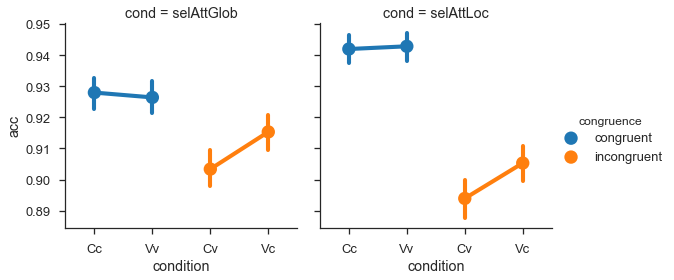

In [46]:
sns.factorplot(x="condition", y="acc", hue="congruence",
               col="cond", unit="participant", data=df, kind="point");

Incidentally, it is possible to use latex in your markdown, for example, drop that Bayes!

\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)

Just kidding, I'm not going to show you how to do a Bayesian analysis on these data...

### I would like to do a logistic mixed model on the accuracy data, but unfortunately statsmodels does not yet support those.

Statsmodel has an alternative method to deal with clustered data: Generalized Estimating Equations (GEE). GEEs have a few attractive advantages over hierarchical linear models (“mixed models”), for example fewer assumptions about the random effects and more intuitive interpretation of coefficients. Especially for discrete dependent variables (i.e., our binary accuracy data) the likelihood-based mixed models can show difficult convergence and a lack of robustness to misspecification of the covariance structure. See also: McNeish, D., Stapleton, L. M., & Silverman, R. D. (2016). [On the Unnecessary Ubiquity of Hierarchical Linear Modeling. Psychological Methods](https://drive.google.com/open?id=0BwlD7q-DXkdWWXRWRG5YZUZ1elU).

In [12]:
# model formulation
fml = "acc ~ cond * congruence"

# covariance structure
ex = sm.cov_struct.Exchangeable()
#link fu
fa = sm.families.Binomial(sm.families.links.logit)

model = sm.GEE.from_formula(fml, "participant", df, cov_struct=ex, family=fa)
result = model.fit()
print(result.summary())
print(result.cov_struct.summary())

                               GEE Regression Results                              
Dep. Variable:                         acc   No. Observations:                82200
Model:                                 GEE   No. clusters:                      266
Method:                        Generalized   Min. cluster size:                 200
                      Estimating Equations   Max. cluster size:                 400
Family:                           Binomial   Mean cluster size:               309.0
Dependence structure:         Exchangeable   Num. iterations:                     8
Date:                     Fri, 25 May 2018   Scale:                           1.000
Covariance type:                    robust   Time:                         16:22:30
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept           

### But reviewer #2 demands a conventional GLMM...so let's use R

# Interfacing between R and python

### Option 1: R interface to python 
- Using library([reticulate](http://blog.rstudio.com/2018/03/26/reticulate-r-interface-to-python))
- Add python code chunks in your Rmarkdown (but no autocomplete so best used sparingly)
- Read in python source files and call its functions
- Automatic variable conversion: e.g. R dataframe becomes pandas dataframe (and vice versa)
- Import python modules from within R and call its functions in the usual R way ($)

### Option 2: Open the R kernel in jupyterlab
- Same environment but separate analyses
- Actual R notebook (jupyte**R**!)
- No real integration: you still rely on writing/reading files

### Option 3: Python interface to R
- Using [rpy2](https://rpy2.readthedocs.io/en/version_2.8.x/) library (*conda install rpy2* into the Anaconda terminal)
- Make a full cell (or a line) of R (by "magic")
- Automatic variable conversion: Pandas dataframe becomes R dataframe (and vice versa)
- Load R libraries

In [28]:
import rpy2.rinterface

%reload_ext rpy2.ipython
%R -n require(lme4); 
%R -n require(tidyr); require(ggplot2)

A killer feature of Jupyter notebooks are **magic commands**. 

- These commands, prefaced with a '%', add some extra power over top of the typical Python syntax to solve common problems that may arise. [More about magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html). We focus on R here but Magic commands are for example also available for javascript plotting in Jupyter.
- *%load_ext* magic command loads the rpy2 jupyter extension into the notebook, essentially initializing the R interface and allowing the notebook to connect and pass objects between the two languages. This magic command needs only to be run once. 
- Double "%" signs affect the whole cell (jupyter code block), for example making it an R code block. 

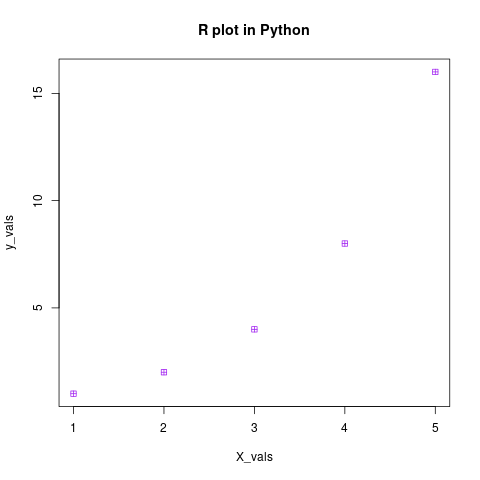

In [17]:
%%R
# ^ Tells the notebook that this code cell is actually R

# Now we can write R code as if this were an R notebook
X_vals <- c(1, 2, 3, 4, 5)
y_vals <- c(1, 2, 4, 8, 16)

plot(X_vals, y_vals,
     col='purple', pch=12,
     main='R plot in Python')

# Passing variables back and forth

- A variable listed after -i on the %%R line will be inputted and converted to an R object from Python. 
- A variable listed after -o on the %%R line will be outputted and converted from an R object to a Python object.

In [2]:
np.random.seed(42)
# Make a pandas DataFrame
testdf = pd.DataFrame(np.random.normal(0,1,size=(100, 3)), columns=list('ABC'))
testdf['C'] = testdf['C'] + 2
testdf.head()


NameError: name 'np' is not defined

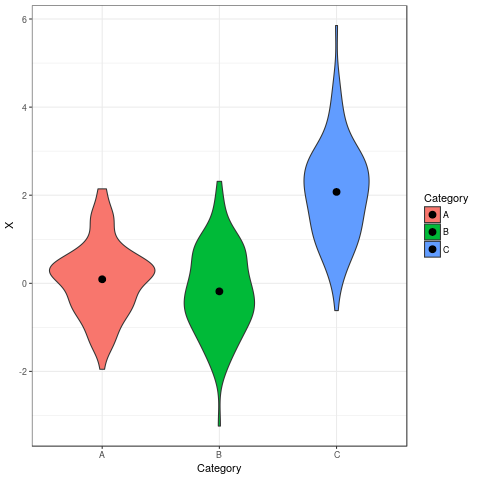

In [19]:
%%R -i testdf
testdf %>% 
  gather("Category", "X") %>%
  ggplot(aes(x = Category, y = X, fill = Category)) +
    geom_violin() +
    stat_summary(fun.y=mean, color='black', geom='point', size = 3) +
    theme_bw()

### But why not stay in python ;-)

  category         X
0        A  0.496714
1        A  1.523030
2        A  1.579213
3        A  0.542560
4        A  0.241962


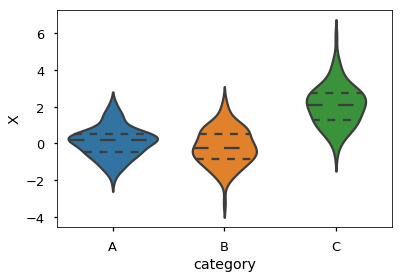

In [25]:
dfmelted = pd.melt(testdf, value_vars=["A","B","C"], var_name="category", value_name="X")
print dfmelted.head()
dfmelted["xbin"] = dfmelted.X > .5

sns.violinplot(x="category", y="X", data=dfmelted, inner="quart");

Note that we used the pandas melt function to go from a dataset in the wide form (testdf above) to long form (done in R with the melt or gather function). There are many more **reshaping and pivoting** functions in pandas, which we won't cover. The best way to get a feel for the pandas reshape and pivot functions is to go through [this brief visual guide](https://jalammar.github.io/visualizing-pandas-pivoting-and-reshaping/). Further details can be found in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reshaping.html).

### Still prefer the ggplot syntax?

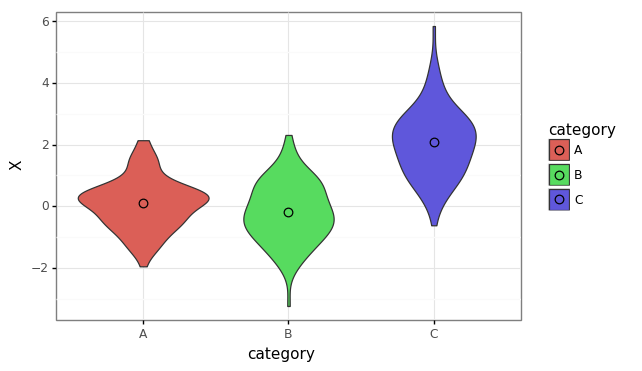

<ggplot: (8743702045645)>

In [60]:
from plotnine import *

(ggplot(dfmelted, aes(x = 'category', y = 'X', fill = 'category'))
    + geom_violin() 
    + stat_summary(fun_y=np.mean, color='black', geom='point', size = 3)
    + theme_bw())

### But we wanted a GLMM on our accuracy data...

In [22]:
dfreduc=df.iloc[:5000]
dfreduc.head()


,acc_mean,acc,acc_std,cond,condition,congruence,corrAns,expversion,gender_x,location,...,resp_raw,rt_mean,rt,rt_std,stimFile,xPos,yPos,Subject,age,gender_y
0,1,1,0,selAttGlob,Cc,congruent,['f'],NaN,F,left_right,...,'f',"0,746331811",0.746332,0,Global_C_local_C.png,NaN,-50,12277,18.0,1.0
1,1,1,0,selAttGlob,Cc,congruent,['f'],NaN,F,up_right,...,'f',"0,687273145",0.687273,0,Global_C_local_D.png,NaN,50,12277,18.0,1.0
2,1,1,0,selAttGlob,Cc,congruent,['f'],NaN,F,down_right,...,'f',"0,705967069",0.705967,0,Global_C_local_F.png,NaN,-50,12277,18.0,1.0
3,1,1,0,selAttGlob,Cc,congruent,['f'],NaN,F,left_right,...,'f',"0,661773503",0.661774,0,Global_C_local_H.png,NaN,-50,12277,18.0,1.0
4,1,1,0,selAttGlob,Cc,congruent,['f'],NaN,F,down_right,...,'f',"0,794407368",0.794407,0,Global_C_local_T.png,NaN,-50,12277,18.0,1.0


In [21]:
%%R
lr.test = function(m1, m2, name){
    print(summary(m1))
    print(summary(m2))
    out = anova(m1, m2)
    chi2 = out$Chisq[2]
    dof = out$"Chi Df"[2]
    p = out$"Pr(>Chisq)"[2]
    test_str = "Likelihood ratio test for %s:\n  Chisq(%d) = %.2f; p = %.3g"
    writeLines(sprintf(test_str, name, dof, chi2, p))
}

In [29]:
%%R -i dfreduc
m = glmer(acc ~ cond * congruence + (1 | participant), dfreduc, family=binomial)
m.null = glmer(acc ~ cond + congruence + (1 | participant), dfreduc, family=binomial)
lr.test(m, m.null, "interaction effect of selective attention * congruence")


Error in glmer(acc ~ cond * congruence + (1 | participant), dfreduc, family = binomial) : 
  could not find function "glmer"


In [1]:
%%R -i dfrt
m = glmer(rt ~ cond * congruence + (1 | participant), dfrt)
m.null = glmer(rt ~ cond + congruence + (1 | participant), dfrt)
lr.test(m, m.null, "interaction effect of selective attention * congruence")

UsageError: Cell magic `%%R` not found.


#### **Conclusion**: It's easy to do data management and manipulations in python, but briefly switch to R for some analysis or visualization that is better supported in R (or vice versa with reticulate).

# Sharing/exporting notebooks

- Export as (see file-menu) html, pdf, markdown, latex...
- Push to github and people can see a pretty-printed but static version (see [the current notebook](https://github.com/gestaltrevision/Reproducible_workflow_tutorial/blob/master/PythoninPsy/tutorialDatawrangling.ipynb))
- Use [nbviewer](http://nbviewer.jupyter.org/) to create a rendered, static version of your notebook
- Use [Binder](https://mybinder.org/) to create a collection of interactive, linked notebooks 

# Sources

Aside from the examples, this tutorial is basically a mashup of sections of these sources:

https://github.com/ujjwalkarn/DataSciencePython

### Data wrangling

* [Jupyter notebook tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Interactive pandas tutorial](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)  
* [Basic pandas tutorial](https://www.dataquest.io/blog/pandas-tutorial-python-2/)
* [Basic tutorial pandas in notebook](http://nikgrozev.com/2015/12/27/pandas-in-jupyter-quickstart-and-useful-snippets/)
* [Preprocessing issues](https://www.datacamp.com/community/tutorials/the-importance-of-preprocessing-in-data-science-and-the-machine-learning-pipeline-i-centering-scaling-and-k-nearest-neighbours#gs.zBXNP2I)
* [Tidy data in python](https://github.com/jfpuget/Tidy-Data/blob/master/Tidy-Data.ipynb)
* http://www.jeannicholashould.com/tidy-data-in-python.html

### Jupyter notebook/lab
* [Notebook tips & tricks, keyboard shortcuts & "magic"](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
* [Useful Jupyter notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)

### R & python
* [use R in jupyter notebooks](http://www.randalolson.com/2013/01/14/filling-in-pythons-gaps-in-statistics-packages-with-rmagic/).
- https://github.com/JaredStufft/instructionals/blob/master/Interfacing%20R%20from%20a%20Python%20Notebook.ipynb
- https://gist.github.com/simecek/019d87c55fec3839d95bbf8489dde61d

### Visualization
* https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/
* http://pbpython.com/python-vis-flowchart.html
* http://pythonplot.com/
* http://pbpython.com/visualization-tools-1.html
* https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
* https://tomaugspurger.github.io/modern-6-visualization
* [Advanced pandas/seaborn tutorial](https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly)
* https://www.marsja.se/response-time-distributions-using-python/
* [Understanding Matplotlib](http://pbpython.com/effective-matplotlib.html) 
* https://towardsdatascience.com/interactive-visualizations-in-jupyter-notebook-3be02ab2b8cd

### Analyses:
* [Multilevel Logistic Regression using PyMC3](https://dansaber.wordpress.com/2016/08/27/analyze-your-experiment-with-a-multilevel-logistic-regression-using-pymc3%E2%80%8B/)
* https://github.com/aloctavodia/Statistical-Rethinking-with-Python-and-PyMC3
* [Python for social scientists](http://nealcaren.github.io/python-tutorials/) 